In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv('D:/Analytics class/PROJECT/Python/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demo = pd.read_csv('D:/Analytics class/PROJECT/Python/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [3]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
cust_demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [5]:
cust_claims = pd.merge(cust_demo , claims , left_on='CUST_ID' , right_on='customer_id' ,how ='left')
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
cust_claims.drop( columns='customer_id', axis=1, inplace= True)
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [7]:
cust_claims.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [8]:
cust_claims['claim_date'] = pd.to_datetime(cust_claims['claim_date'] )
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['DateOfBirth'])
cust_claims['DateOfBirth'] = np.where(cust_claims['DateOfBirth'].dt.year >2020 , 
                                      cust_claims['DateOfBirth'] - pd.DateOffset(years= 100), cust_claims['DateOfBirth'] )

In [9]:
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [10]:
cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$', '').astype('float')

In [11]:
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [12]:
def alert_flag (x):
    if x.police_report == 'No':
        return '0'
    elif x.police_report == 'Yes':
        return '1'
    else :
        return 'NaN'

In [13]:
cust_claims['alert_flag'] = cust_claims.apply(alert_flag , axis= 1)
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

In [14]:
cust_claims =  cust_claims.drop_duplicates( subset=['CUST_ID'])
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [15]:
cust_claims.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alert_flag              0
dtype: int64

In [16]:
#Imputing missing values of categorical variables to mode 
cat_col = ['claim_id','incident_cause','claim_date','claim_area','police_report','claim_type',
           'total_policy_claims','fraudulent']
for col in cat_col:
    cust_claims[col]= cust_claims[col].fillna(cust_claims[col].mode().iloc[0], axis=0)

In [17]:
#Imputing missing values of continuous varible to mode 
cust_claims['claim_amount'] = cust_claims.claim_amount.fillna(cust_claims.claim_amount.mean(), axis = 0)

In [18]:
cust_claims.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

In [19]:
cust_claims['age'] = (pd.Timestamp('now')-cust_claims['DateOfBirth']).astype('<m8[Y]')
cust_claims.age.head(2)

0    42.0
1    51.0
Name: age, dtype: float64

In [20]:
def age_group (x):
    if x.age < 18 :
        return 'children'
    elif x.age < 30:
        return 'youth'
    elif x.age <= 60:
        return 'adult'
    else :
        return 'senior'

In [21]:
cust_claims['age_group'] = cust_claims.apply(age_group , axis = 1)
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,age,age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,42.0,adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN,51.0,adult


### 8. What is the average amount claimed by the customers from various segments?

In [22]:
round(cust_claims.groupby('Segment')[['claim_amount']].mean(),2)

,claim_amount
Segment,
Gold,12755.71
Platinum,12370.14
Silver,12271.16


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [23]:
round(cust_claims.loc[cust_claims.claim_date < '2018-9-10',:].groupby('incident_cause')[['claim_amount']].sum(),2)

,claim_amount
incident_cause,
Crime,724462.49
Driver error,3264285.98
Natural causes,1312705.99
Other causes,3812331.96
Other driver error,3318806.48


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [24]:
cust_claims.loc[((cust_claims.State == 'TX') | (cust_claims.State == 'DE') | (cust_claims.State == 'AK'))
                & (cust_claims.incident_cause.str.lower().str.contains('driver'))
                & (cust_claims.age_group == 'adult') ,:].groupby('State')[['State']].count()

,State
State,
AK,8
DE,12
TX,9


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [25]:
gender_seg = pd.pivot_table(cust_claims, values= 'claim_amount', index='gender', columns='Segment')
gender_seg

Segment,Gold,Platinum,Silver
gender,,,
Female,12338.569681,12278.216434,11662.469737
Male,13114.452404,12475.038148,12823.311354


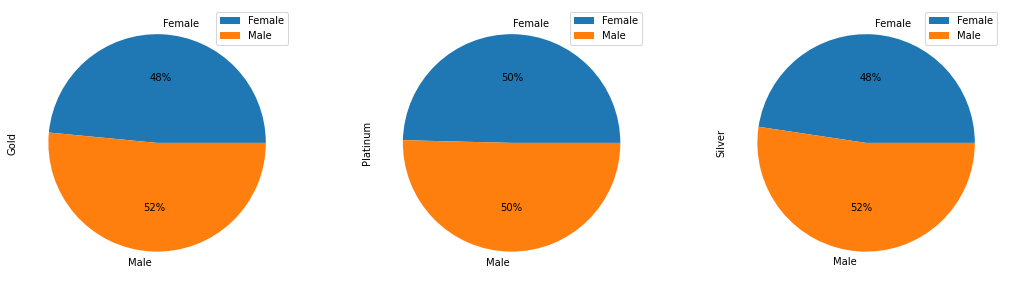

In [26]:
gender_seg.plot(kind = 'pie', autopct="%1.0f%%",subplots= True , figsize =(18,5))
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [27]:
g1 = cust_claims.loc[cust_claims.incident_cause.str.lower().str.contains('driver')
                     ,:].groupby('gender')[['gender']].count().add_prefix("CountOf_").reset_index()
g1

,gender,CountOf_gender
0,Female,221
1,Male,280


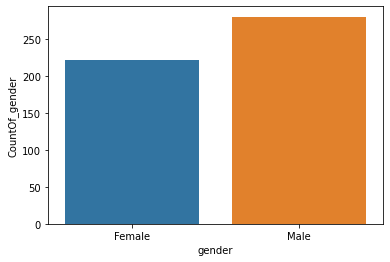

In [28]:
sns.barplot(x = "gender", y = "CountOf_gender", data = g1)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [29]:
fraud_age = cust_claims.groupby('age_group')[['fraudulent']].count().reset_index()
fraud_age

,age_group,fraudulent
0,adult,823
1,senior,14
2,youth,248


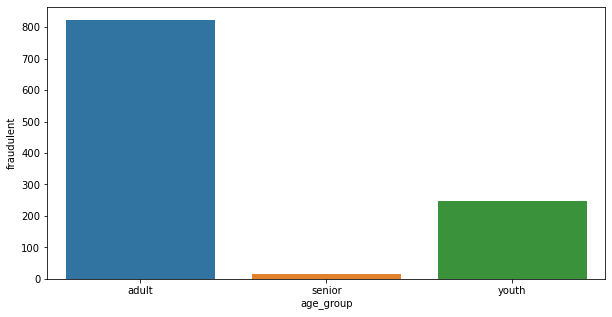

In [30]:
plt.figure(figsize=(10,5))
sns.barplot( x = 'age_group', y ='fraudulent' , data = fraud_age)
plt.show()

In [31]:
print('Adult had maximum fraudulant policy claim')

Adult had maximum fraudulant policy claim


### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [32]:
cust_claims['month'] = cust_claims['claim_date'].apply(lambda x: pd.Timestamp.strftime(x , format = '%B'))

In [33]:
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,age,age_group,month
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,42.0,adult,November
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN,51.0,adult,October


In [34]:
monthly_amount = round(cust_claims.groupby('month')[['claim_amount']].sum().reset_index(),2)
monthly_amount

,month,claim_amount
0,April,1276071.50
1,August,911203.50
2,December,696701.50
3,February,1133106.99
4,January,1419305.48
5,July,1379034.99
6,June,1276332.99
7,March,1320093.99
8,May,1114211.49
9,November,601125.00


In [35]:
monthly_amount['N_month'] = pd.DatetimeIndex(pd.to_datetime(monthly_amount['month'], format='%B')).month
monthly_amount = monthly_amount.sort_values(by='N_month' )
monthly_amount

,month,claim_amount,N_month
4,January,1419305.48,1
3,February,1133106.99,2
7,March,1320093.99,3
0,April,1276071.50,4
8,May,1114211.49,5
6,June,1276332.99,6
5,July,1379034.99,7
1,August,911203.50,8
11,September,980647.99,9
10,October,1422655.49,10


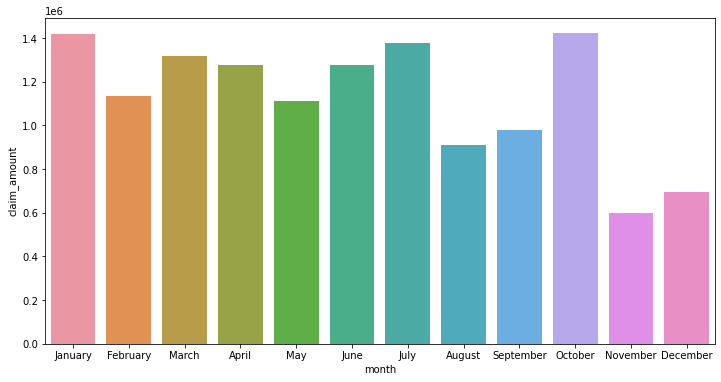

In [36]:
plt.figure( figsize = (12,6))
sns.barplot( data = monthly_amount , x = 'month' , y ='claim_amount')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [37]:
gender_age =  round(pd.pivot_table( data = cust_claims, index = ['age_group',
               'fraudulent'] , columns='gender' , values = 'claim_amount').reset_index(), 2)
gender_age.set_index('age_group' , inplace = True)
gender_age

gender,fraudulent,Female,Male
age_group,,,
adult,No,12140.22,12166.80
adult,Yes,12006.16,16076.04
senior,No,12470.50,9836.25
senior,Yes,2622.00,NaN
youth,No,13291.23,12477.52
youth,Yes,8278.35,11153.52


In [38]:
fraudulant_claim = gender_age.loc[gender_age.fraudulent == 'Yes']
fraudulant_claim


gender,fraudulent,Female,Male
age_group,,,
adult,Yes,12006.16,16076.04
senior,Yes,2622.00,NaN
youth,Yes,8278.35,11153.52


In [39]:
non_fraudulant_claim = gender_age.loc[gender_age.fraudulent == 'No']
non_fraudulant_claim

gender,fraudulent,Female,Male
age_group,,,
adult,No,12140.22,12166.80
senior,No,12470.50,9836.25
youth,No,13291.23,12477.52


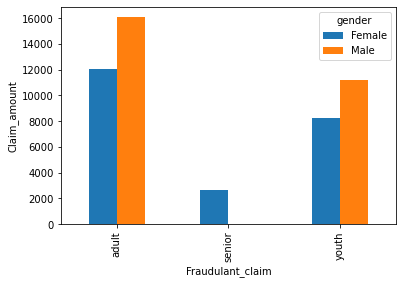

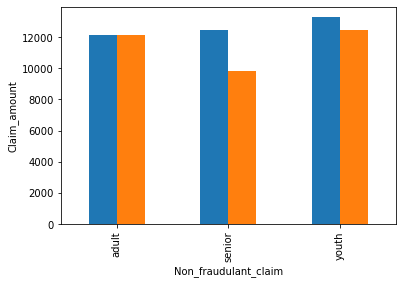

In [40]:
fraudulant_claim.plot(kind = 'bar' )
plt.xlabel('Fraudulant_claim')
plt.ylabel('Claim_amount')

non_fraudulant_claim.plot(kind = 'bar', legend = False)
plt.xlabel('Non_fraudulant_claim')
plt.ylabel('Claim_amount')

plt.show()

# Hypothesis testing

### 16. Is there any similarity in the amount claimed by males and females?

In [54]:
cust_claims.gender.unique()

array(['Female', 'Male'], dtype=object)

In [48]:
male = cust_claims.loc[ cust_claims.gender == 'Male', 'claim_amount' ]
female = cust_claims.loc[ cust_claims.gender == 'Female', 'claim_amount']

# print the avg/mean of male & female claim amount 
print( 'mean of male claim amount:', round(male.mean(), 1), 
          '| mean of female claim amount:', round(female.mean(), 1))

mean of male claim amount: 12821.5 | mean of female claim amount: 12105.6


In [51]:
# Ho: u_male = u_female
# Ha: u_male <> u_female

# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test
print( stats.ttest_ind( male, female ) )

# business conclusion
# With the give data we can not say the amount claimed by the male and female customer is different.

Ttest_indResult(statistic=0.8848199716864555, pvalue=0.37645013430168395)


### 17. Is there any relationship between age category and segment?

In [58]:
# data prep for chi square test
obs = pd.crosstab( cust_claims.age_group, cust_claims.Segment )
print('observed frequenct table', '\n', obs)

# Ho: No relationship, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test
print('\n\n', 'expected frequenct table', '\n', 
      pd.DataFrame(stats.chi2_contingency( obs )[3]).round(0))

stats.chi2_contingency( obs )

# business conclusion
# With the give data we can not say that the age category and segments are related.

observed frequenct table 
 Segment    Gold  Platinum  Silver
age_group                        
adult       290       272     261
senior        4         6       4
youth        78        86      84


 expected frequenct table 
        0      1      2
0  282.0  276.0  265.0
1    5.0    5.0    5.0
2   85.0   83.0   80.0


(1.7811491382695646,
 0.7759293696527169,
 4,
 array([[282.17142857, 276.10322581, 264.72534562],
        [  4.8       ,   4.69677419,   4.50322581],
        [ 85.02857143,  83.2       ,  79.77142857]]))

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [59]:
# print the avg/mean of the samples
print( 'mean of sample claim amount:', round(cust_claims.claim_amount.mean(), 1) )

mean of sample claim amount: 12470.5


In [62]:
# Ho: u <= 10000
# Ha: u > 10000

# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test
print( stats.ttest_1samp( cust_claims.claim_amount, 10000 ) )

# business conclusion
# Average claim amount of the customers has increase from 2016-17 fiscal average which was $10,000.

Ttest_1sampResult(statistic=6.108222642303586, pvalue=1.4021917187052693e-09)


### 19. Is there any difference between age groups and insurance claims?

In [65]:
cust_claims.age_group.unique()

array(['adult', 'youth', 'senior'], dtype=object)

In [67]:
# data prep
cust_claims.age_group.unique()

# select the usage variable
var = 'claim_amount'

# get the 3 samples, one for each segment of customer
s1 = cust_claims.loc[ cust_claims.age_group == 'adult', var ]
s2 = cust_claims.loc[ cust_claims.age_group == 'youth', var ]
s3 = cust_claims.loc[ cust_claims.age_group == 'senior', var ]

# print the avg/mean of three samples
print( 'mean of s1:', round(s1.mean(), 1), 
          '| mean of s2:', round(s2.mean(), 1), 
              ' | mean of s3:', round(s3.mean(), 1) )

mean of s1: 12593.7 | mean of s2: 12265.8  | mean of s3: 8854.8


In [68]:
# Ho: samples are from same population
# Ha: samples are from different population
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test
print( stats.f_oneway( s1, s2, s3 ) )

# Business conclusion
# with the give data we cannot say that there is a difference between age groups and insurance claims.

F_onewayResult(statistic=0.5796079257913881, pvalue=0.5602917426784131)


### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [69]:
cust_claims.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,age,age_group,month
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,42.0,adult,November
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN,51.0,adult,October


In [74]:
# Ho: No corelation, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test
print( stats.spearmanr( cust_claims.claim_amount ,cust_claims.total_policy_claims ))

# business conclusion
# with the give data we cannot say that  total no. of policy claims is related to claim amount.

SpearmanrResult(correlation=0.007141709969904041, pvalue=0.8142281099101467)
